In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from model.random_agents import ObserverAndPlanter

In [3]:
import torch 
import numpy as np
from envs import env

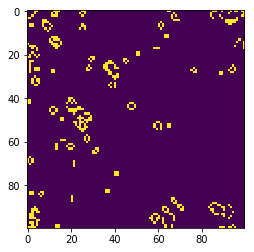

KeyboardInterrupt: 

In [5]:
from IPython.display import clear_output
from time import sleep

sandbox = env.Env(grid_size=(100,100))
agent = ObserverAndPlanter(100, 10)
optim = torch.optim.Adam(agent.parameters())

loss = torch.nn.L1Loss()



target = torch.ones(10, 10)
for i in range(1000):
    perception_field, x0,x1,y0, y1 = agent.forward(torch.tensor(sandbox.grid).float())
    
    #l = loss(perception_field, sandbox.grid)
    #l.backward()
    
    env_state = sandbox.step(perception_field=perception_field.detach(), 
                         field_position_x=x0, 
                         field_position_y=y0, n_steps=10)
    sandbox.grid_update(10)
    
    optim.step()
    clear_output(wait=True)
    optim.zero_grad()
    plt.imshow(sandbox.grid)
    plt.show()